In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
import time
import datetime
from scipy import stats
from pprint import pprint
from time import sleep

#import weather API Key
from config import api_key

#Use citipy to find city based on Latitude and Longitude
from citipy import citipy 


# Generate the List of Cities

In [2]:
# generate the list of coordinates used to find cities

#set the desired number of cities
num_cities = 500

#set the lists for latitude and longitude
lat = []
lng = []

#it is possible that duplicate coordinates may be generated, or unique coordinates may lead to duplicate cities.
# this buffer will allow the dataset to drop duplicates while still generating enough coordinates for the search.
coordinate_buffer = 3

lat = np.random.uniform(low=-90.000, high=90.000, size=num_cities*coordinate_buffer)
lng = np.random.uniform(low=-180.000, high=180.000, size=num_cities*coordinate_buffer)

#zip the latitudes and longitudes into a list of tuples to look up values in citipy
coordinates = list(zip(lat, lng))

In [3]:
# generate the list of cities using coordinates
cities = []

#find cities that match coordinates in citipy:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #add to the list of cities only if it is not a duplicate
    if city not in cities:
        cities.append(city)
    

# Search for the Cities

In [4]:
# set url and units for search query

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [5]:
#save the following values for each city: 
# Temperature, % Humidity, % Cloudiness, Wind speed MPH
cityList = []
temp = []
humid = []
cloud = []
wind = []
newlat = []
newlong = []
country = []
count = 0

# loop through each city
for city in cities:
    
#     create a search query, make request and store in json
    full_query = query_url + city
    response = requests.get(full_query)
    weather_data = response.json()
    
    # check to see if the city is in the database. If not, move on to the next city in the list.
    try: 
        # if there is a match, add the needed information to each list
        newlat.append(weather_data['coord']['lat'])  
        newlong.append(weather_data['coord']['lon'])
        temp.append(weather_data['main']['temp'])
        humid.append(weather_data['main']['humidity'])
        wind.append(weather_data['wind']['speed'])
        cloud.append(weather_data['clouds']['all'])
        cityList.append(weather_data['name'])
        country.append(weather_data['sys']['country'])
        
#         Update the counter
        count = count + 1
    
#         Print the results
        print(f'{count}. {city} data has been saved.')
        
    except:
        print(f'{city} could not be found.')
        
    # delay the next query to avoid exceeding the API limits
    sleep(1)  


1. pochutla data has been saved.
2. vaini data has been saved.
3. hasaki data has been saved.
4. narsaq data has been saved.
5. hermanus data has been saved.
6. severodvinsk data has been saved.
7. athabasca data has been saved.
8. jamestown data has been saved.
9. ushuaia data has been saved.
10. nikolskoye data has been saved.
11. persianovskiy data has been saved.
12. tiksi data has been saved.
umzimvubu could not be found.
13. north platte data has been saved.
14. atuona data has been saved.
15. hendersonville data has been saved.
16. rikitea data has been saved.
17. tabriz data has been saved.
18. puerto ayora data has been saved.
19. cherskiy data has been saved.
20. hualmay data has been saved.
21. carnarvon data has been saved.
22. fortuna data has been saved.
23. severo-kurilsk data has been saved.
24. bengkulu data has been saved.
25. vila franca do campo data has been saved.
26. castro data has been saved.
27. kruisfontein data has been saved.
28. mataura data has been saved

219. kantunilkin data has been saved.
solovetskiy could not be found.
220. camopi data has been saved.
221. ngunguru data has been saved.
222. rye brook data has been saved.
223. orlik data has been saved.
224. gambo data has been saved.
225. muroto data has been saved.
226. mayumba data has been saved.
227. havoysund data has been saved.
228. pauini data has been saved.
229. calabozo data has been saved.
230. raudeberg data has been saved.
231. half moon bay data has been saved.
vaitupu could not be found.
232. luderitz data has been saved.
233. yar-sale data has been saved.
234. yenagoa data has been saved.
235. egvekinot data has been saved.
236. thongwa data has been saved.
samusu could not be found.
237. bandar-e lengeh data has been saved.
238. lasa data has been saved.
la uribe could not be found.
239. kilindoni data has been saved.
240. santa rosa data has been saved.
241. richards bay data has been saved.
242. olafsvik data has been saved.
243. amahai data has been saved.
244.

438. am timan data has been saved.
439. dumai data has been saved.
440. limache data has been saved.
441. nelson bay data has been saved.
442. alofi data has been saved.
443. tanabe data has been saved.
444. tessalit data has been saved.
445. asbe teferi data has been saved.
446. poya data has been saved.
447. daloa data has been saved.
448. paamiut data has been saved.
449. sirnak data has been saved.
450. kiama data has been saved.
451. methven data has been saved.
452. stromness data has been saved.
453. bardoli data has been saved.
454. ugoofaaru data has been saved.
455. pedasi data has been saved.
456. porto velho data has been saved.
457. panguna data has been saved.
458. bubaque data has been saved.
459. kostyantynivka data has been saved.
460. rocha data has been saved.
461. sur data has been saved.
462. broome data has been saved.
463. tsabong data has been saved.
464. fort nelson data has been saved.
465. ozernovskiy data has been saved.
466. manati data has been saved.
467.

In [22]:
# #create a data frame from cities, temp, humid, cloud, and wind
weatherInfoDict = {
    "City":cityList,
    "Country":country,
    "Latitude":newlat,
    "Longintude":newlong, 
    "Temperature (F)":temp,
    "% Humidity":humid,
    "% Cloud Cover":cloud,
    "Wind Speed (MPH)":wind
}

weatherDF = pd.DataFrame(weatherInfoDict)
weatherDF

,City,Country,Latitude,Longintude,Temperature (F),% Humidity,% Cloud Cover,Wind Speed (MPH)
0,Pochutla,MX,15.74,-96.47,84.99,73,24,3.44
1,Vaini,TO,-21.20,-175.20,77.00,73,75,11.41
2,Hasaki,JP,35.73,140.83,86.77,74,40,4.70
3,Narsaq,GL,60.92,-46.05,46.40,87,100,4.70
4,Hermanus,ZA,-34.42,19.23,55.00,88,99,5.01
...,...,...,...,...,...,...,...,...
551,Mareeba,AU,-17.00,145.43,76.23,65,0,1.99
552,Veselynove,UA,47.36,31.23,63.77,53,0,3.02
553,Belaya Gora,RU,68.53,146.42,57.33,51,99,6.87
554,Tuy Hoa,VN,13.08,109.30,86.11,67,99,9.60


# Scatter Plot Function

In [7]:
# create a function for scatter plots
def plotFunc(x_values, y_values):
    #create plot
    plt.figure(figsize=(6, 4), dpi=80)
    plt.scatter(x_values, y_values)


# Linear Regression Plot Function

In [8]:
#optional: create a function that writes linear regression plots
def linRegressFunc(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    #create plot
    plt.figure(figsize=(6, 4), dpi=80)
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    #create line equation and annotate
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

    
    #calculate and print r squared to determine strength of correlation
    print(f'The r-squared is: {rvalue**2}')

# Temperature vs. Latitude
Worldwide plot and both regressions

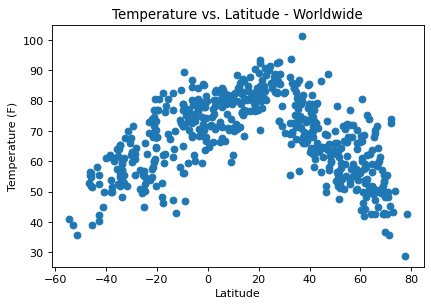

In [9]:
#First plot - Temperature vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['Temperature (F)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Temp_vs_Lat_All.png")

plt.show()

## Worldwide Temperature vs. Latitude Analysis

This appears to be a normal distribution of temparature, that is centered at slightly above the equator. This makes sense - the hottest temperatures will be around the equator. Temperature will drop as you move away from the equator in either direction. We can also expect that the northern hemisphere temperatures will likely be higher, as it is currently summer in the northern hemisphere, and winter in the southern hemisphere. The center of the distribution would be in the negative values as temperatures increase in the southern hemisphere, and decrease in the north.

The r-squared is: 0.5238976383061829


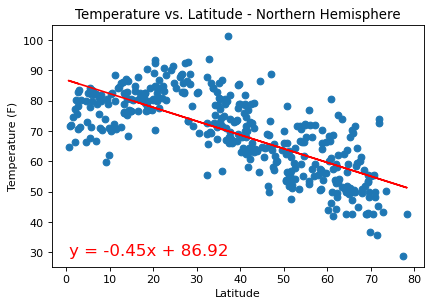

In [10]:
#Northern Hemisphere - Temperature vs. latitude

#filter for values in the northern hemisphere
northDF = weatherDF.loc[weatherDF["Latitude"] > 0]

linRegressFunc(northDF["Latitude"], northDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Northern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_North.png")

plt.show()

## Northern Hemisphere - Temp vs Lat Analysis
An r-squared of 0.52 indicates a moderate correlation between temperature and latitude. As you move further away from the equator, the temperature generally decreases. However, there are likely other factors in play. 

The r-squared is: 0.47591305444885457


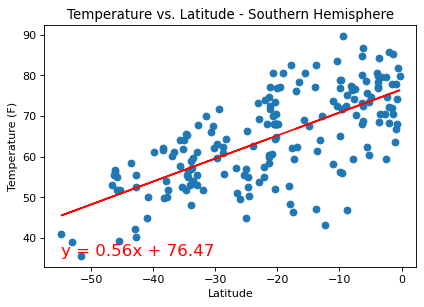

In [11]:
#Southern Hemisphere - Temperature vs. latitude

#filter for values in the southern hemisphere
southDF = weatherDF.loc[weatherDF["Latitude"] < 0]

linRegressFunc(southDF["Latitude"], southDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Southern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_South.png")

plt.show()

## Southern Hemisphere - Temp vs Lat Analysis
It's unexpected that the r-squared is so much lower in the southern hemisphere. There are a number of factors that affect temperature that may have a greater influence at the moment. The r-squared of 0.476 means there is a weak correlation between the two factors in the southern hemisphere.

# % Humidity vs. Latitude
Worldwide plot and both regressions

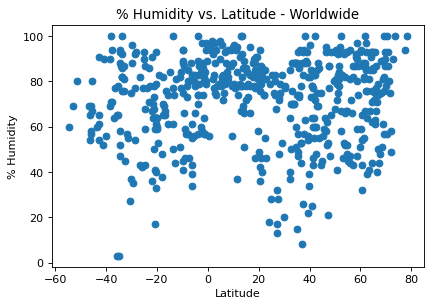

In [12]:
#Second plot - Humidity (%) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Humid_vs_Lat_All.png")

plt.show()

The r-squared is: 0.006866134138103957


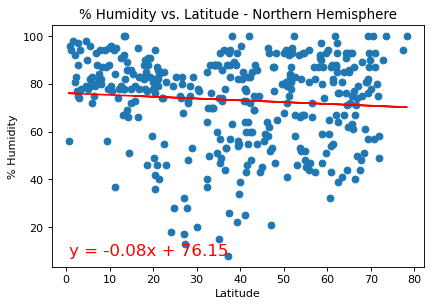

In [13]:
# Humidity (%) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_North.png")

plt.show()

The r-squared is: 0.010343519295481817


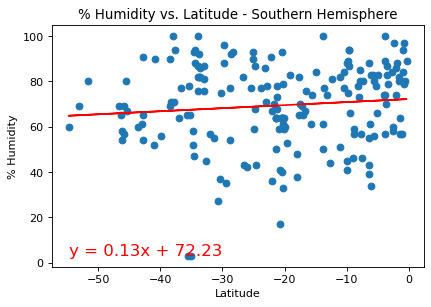

In [14]:
# Humidity (%) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_South.png")

plt.show()

## Humidity vs. Latitude Analysis
Both r-squared values for humidity vs. latitude are below 0.3. There is no real correlation between these factors. This makes sense - one would expect proximity to bodies of water and landscape factors to have strong impacts on humidity, which may be why the correlation is basically nonexistent


# Cloudiness (%) vs. Latitude
Worldwide plot and both regressions

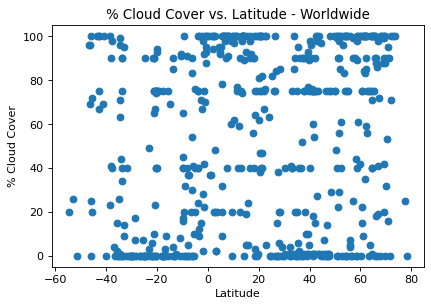

In [15]:
#Third plot - Cloudiness (%) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_All.png")

plt.show()

The r-squared is: 0.0015996072668454085


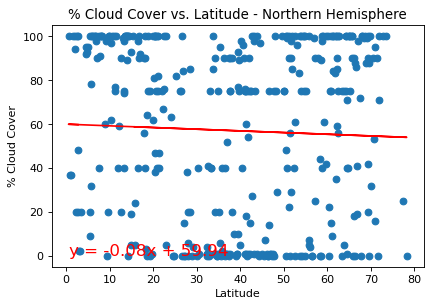

In [16]:
# Cloudiness (%) vs. Latitude - Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_North.png")

plt.show()

The r-squared is: 0.0030802127523815895


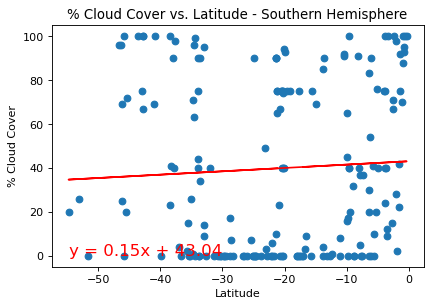

In [17]:
# Cloudiness (%) vs. Latitude - Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_South.png")

plt.show()

## Cloudiness Analysis

With r-squareds even lower for this factor, it appears that cloudiness and latitude have no correlation. This also makes sense - weather patterns appear and circulate all over the globe, and we don't tend to see specific cloud cover conditions associated with regions based on how far north or south they are.

# Wind Speed vs. Latitude
Worldwide plot and both regressions

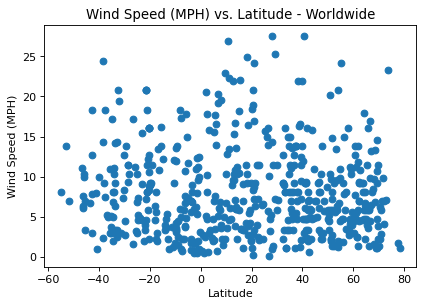

In [18]:
#Fourth Plot - Wind Speed (mph) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Wind_vs_Lat_All.png")

plt.show()


The r-squared is: 0.014494093762119124


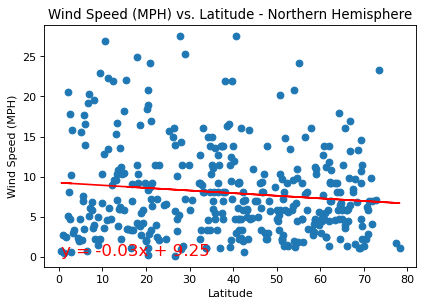

In [19]:
# Wind Speed (mph) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Wind_vs_Lat_North.png")

plt.show()

The r-squared is: 0.034417312917380455


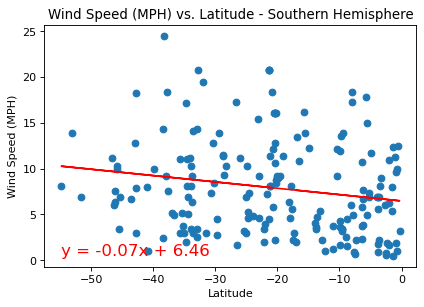

In [20]:
# Wind Speed (mph) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Wind_vs_Lat_South.png")

plt.show()

## Wind Speed Analysis
The r-squareds for wind speed are similarly uncorellated with latitude. Wind speed has to due with temperature changes, pressure systems, and other factors. Wind speed is independent of latitude.

In [23]:
#save all data in a CSV
weatherDF.to_csv('../data/weather_data.csv', encoding='utf-8', index=False)